# Example 13 Analysis

We will plot the rate binned in energy deposition, and compare it to the output of Example 5, showing that screening is reducing the rate at low $q, \omega$. We also compare it to the analytically screened rate from Example 12.

## Packages

In [1]:
import numpy as np

# some personal preferences for nice plots
%run "../../utilities/output_parser/plotter.ipynb"

# helpful functions for processing output
import sys
sys.path.append("../../utilities/output_parser")
import EXDMDataHandler
from EXDMDataHandler import EXDMData

## Data

In [2]:
data = EXDMData(filename = './output/EXDM_out_example_13.hdf5')

## Results

### Binned Scatter Rate

#### Data

In [3]:
[ E_bin_LHS, binned_scatter_rate_E ] = data.get_binned_scatter_rate_E(mass_MeV = 10**3, 
                                                                      med_FF = 0., 
                                                                      sigma_cm2 = 10**(-40),
                                                                      E_bin_width = 5.)

#### Plot

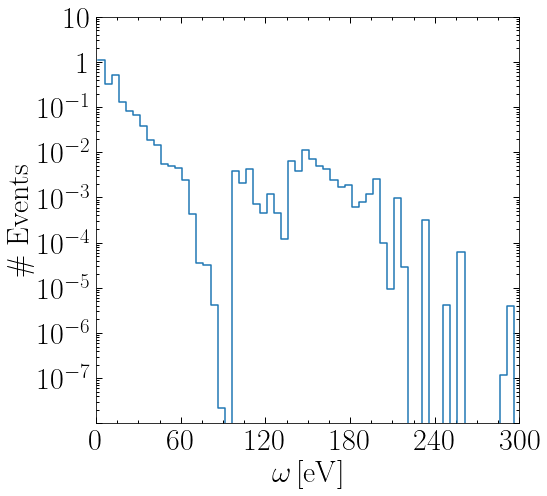

In [4]:
save_fig = True

fig, axes = plt.subplots(nrows=1, ncols=1, 
                             figsize=(7*1.1, 7))

E_min = 0
E_max = 300
dE = 60.

log_events_min = -8
log_events_max = 1

set_custom_tick_options(axes)
set_custom_axes(axes, 'x', E_min, E_max,
               ax_type = 'lin', 
               label = r'$\omega \, [\mathrm{eV}]$', 
               step = dE)
set_custom_axes(axes, 'y', log_events_min, log_events_max,
               ax_type = 'log', 
               label = r'$\# \ \mathrm{Events}$', 
               show_first = False)

axes.step(
    E_bin_LHS, 
    np.log10(binned_scatter_rate_E),
    where = 'post'
)

fig.tight_layout()
    
if save_fig:
    plt.savefig('./output/Si_numeric_screened_binned_scatter_rate_2x2x2.pdf', 
                bbox_inches='tight', pad_inches = 0.075)

plt.show()

### Binned Scatter Rate (with example 5, 12 results)

#### Data

In [5]:
data_ex5 = EXDMData(filename = '../5/output/EXDM_out_example_5.hdf5')
[ E_bin_LHS_ex5, binned_scatter_rate_E_ex5 ] = data_ex5.get_binned_scatter_rate_E(mass_MeV = 10**3, 
                                                                      med_FF = 0., 
                                                                      sigma_cm2 = 10**(-40),
                                                                      E_bin_width = 5.)

data_ex12 = EXDMData(filename = '../12/output/EXDM_out_example_12.hdf5')
[ E_bin_LHS_ex12, binned_scatter_rate_E_ex12 ] = data_ex12.get_binned_scatter_rate_E(mass_MeV = 10**3, 
                                                                      med_FF = 0., 
                                                                      sigma_cm2 = 10**(-40),
                                                                      E_bin_width = 5.)

#### Plot

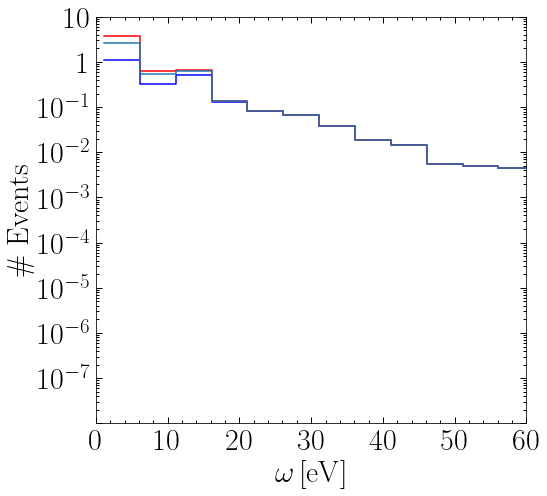

In [8]:
save_fig = True

fig, axes = plt.subplots(nrows=1, ncols=1, 
                             figsize=(7*1.1, 7))

E_min = 0
E_max = 60
dE = 10.

log_events_min = -8
log_events_max = 1

set_custom_tick_options(axes)
set_custom_axes(axes, 'x', E_min, E_max,
               ax_type = 'lin', 
               label = r'$\omega \, [\mathrm{eV}]$', 
               step = dE)
set_custom_axes(axes, 'y', log_events_min, log_events_max,
               ax_type = 'log', 
               label = r'$\# \ \mathrm{Events}$', 
               show_first = False)

axes.step(
    E_bin_LHS, 
    np.log10(binned_scatter_rate_E),
    where = 'post',
    color = 'blue'
)

axes.step(
    E_bin_LHS_ex5, 
    np.log10(binned_scatter_rate_E_ex5),
    where = 'post',
    color = 'red'
)

axes.step(
    E_bin_LHS_ex12, 
    np.log10(binned_scatter_rate_E_ex12),
    where = 'post'
)

fig.tight_layout()
    
if save_fig:
    plt.savefig('./output/Si_screened_binned_scatter_rate_2x2x2_compare.pdf', 
                bbox_inches='tight', pad_inches = 0.075)

plt.show()